In [20]:
import re
import pandas as pd

df = pd.read_csv("./itworld_news.csv")
df.head()

,topic,title,text
0,퍼스널 컴퓨팅,"구글, 8월부터 윈도우 8·8.1용 구글 드라이브 지원 중단",마이크로소프트가 지난 2016년 윈도우 8 지원을 종료하고 올해 초 윈도우 8.1에...
1,퍼스널 컴퓨팅,"글로벌 칼럼ㅣ애플의 야심 찬 ‘비전 프로’, 지울 수 없는 ‘홀로렌즈’라는 기시감","허공에 고정할 수 있는 창부터 3차원 공룡, 화상통화, 땅에서 솟아오르는 3D 성까..."
2,퍼스널 컴퓨팅,글로벌 칼럼ㅣWWDC의 진정한 주인공은 애플 실리콘이다,WWDC의 진정한 주인공은 여전히 애플 실리콘이다. 비전 프로 헤드셋이 가장 많은 ...
3,퍼스널 컴퓨팅,“얽히고 설킨” 케이블과의 전쟁⋯2023 PC 하드웨어 최신 트렌드,"데스크톱 PC를 조립할 때 가장 번거로운 부분은 무엇일까? 부품의 호환성 확인, 비..."
4,퍼스널 컴퓨팅,"인텔 11세대 타이거 레이크 연내 단종, 여름 이후 할인 폭 클 듯",11세대 타이거 레이크 프로세서가 단종되고 남은 물량은 연내 할인 판매 등으로 소진...


#### 데이터 정제

In [23]:
t = []

for title in df['title']:
    
    RE_FILTER = re.compile("[.,!?\"'‘’“”•▲:;~()]")    # 정규 표현식 필터
    title = re.sub(RE_FILTER, "", title)    # 특수기호 제거
    
    t.append(title)

df['title'] = t
df['title'].head()

0              구글 8월부터 윈도우 8·81용 구글 드라이브 지원 중단
1    글로벌 칼럼ㅣ애플의 야심 찬 비전 프로 지울 수 없는 홀로렌즈라는 기시감 
2               글로벌 칼럼ㅣWWDC의 진정한 주인공은 애플 실리콘이다
3          얽히고 설킨 케이블과의 전쟁⋯2023 PC 하드웨어 최신 트렌드
4         인텔 11세대 타이거 레이크 연내 단종 여름 이후 할인 폭 클 듯
Name: title, dtype: object

In [21]:
list = []

for doc in df['text']:
    
    RE_FILTER = re.compile("[.,!?\"'‘’“”•▲:;~()]")    # 정규 표현식 필터
    doc = re.sub(RE_FILTER, "", doc)    # 특수기호 제거
    
    list.append(doc)

df['text'] = list
df['text'].head()

0    마이크로소프트가 지난 2016년 윈도우 8 지원을 종료하고 올해 초 윈도우 81에 ...
1    허공에 고정할 수 있는 창부터 3차원 공룡 화상통화 땅에서 솟아오르는 3D 성까지 ...
2    WWDC의 진정한 주인공은 여전히 애플 실리콘이다 비전 프로 헤드셋이 가장 많은 관...
3    데스크톱 PC를 조립할 때 가장 번거로운 부분은 무엇일까 부품의 호환성 확인 비싼 ...
4    11세대 타이거 레이크 프로세서가 단종되고 남은 물량은 연내 할인 판매 등으로 소진...
Name: text, dtype: object

In [45]:
df.to_csv('itworld_news_preprocessing.csv', index = False)

#### 데이터 전처리

In [6]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer

In [26]:
df = pd.read_csv("./itworld_news_preprocessing.csv")
df.head()

,topic,title,text
0,퍼스널 컴퓨팅,구글 8월부터 윈도우 8·81용 구글 드라이브 지원 중단,마이크로소프트가 지난 2016년 윈도우 8 지원을 종료하고 올해 초 윈도우 81에 ...
1,퍼스널 컴퓨팅,글로벌 칼럼ㅣ애플의 야심 찬 비전 프로 지울 수 없는 홀로렌즈라는 기시감,허공에 고정할 수 있는 창부터 3차원 공룡 화상통화 땅에서 솟아오르는 3D 성까지 ...
2,퍼스널 컴퓨팅,글로벌 칼럼ㅣWWDC의 진정한 주인공은 애플 실리콘이다,WWDC의 진정한 주인공은 여전히 애플 실리콘이다 비전 프로 헤드셋이 가장 많은 관...
3,퍼스널 컴퓨팅,얽히고 설킨 케이블과의 전쟁⋯2023 PC 하드웨어 최신 트렌드,데스크톱 PC를 조립할 때 가장 번거로운 부분은 무엇일까 부품의 호환성 확인 비싼 ...
4,퍼스널 컴퓨팅,인텔 11세대 타이거 레이크 연내 단종 여름 이후 할인 폭 클 듯,11세대 타이거 레이크 프로세서가 단종되고 남은 물량은 연내 할인 판매 등으로 소진...


In [38]:
print(len(df['topic'].unique()))
df['topic'].unique()

27


array(['퍼스널 컴퓨팅', '디지털 디바이스', 'IoT', '윈도우', '게임', '보안', '스마트폰', '미래기술',
       '개발자', '글로벌 트렌드', '데이터센터', 'VRㆍAR', '오픈소스', '기업 문화', '블록체인',
       'AIㆍML', '스토리지', 'IT 관리', '모바일', '애플리케이션', '오피스ㆍ협업', 'iOS',
       '데이터ㆍ분석', '클라우드', '가상화ㆍ컨테이너', '네트워크', '맥OS'], dtype=object)

In [27]:
df['text'][0]

'마이크로소프트가 지난 2016년 윈도우 8 지원을 종료하고 올해 초 윈도우 81에 대한 지원을 종료했지만 여전히 많은 사람이 미지원 버전을 사용한다 이제 구글도 최신 운영체제로 전환하도록 압력을 가하고 있다 오는 8월부터 구글은 윈도우 8 및 81용 구글 드라이브 지원을 중단한다 Foundry/Google안드로이드 폴리스Android Police의 보도에 따르면 구글 드라이브 지원 페이지에서는 중단 없는 서비스를 위해 윈도우 10 특히 64비트 버전으로 업그레이드하라고 안내하고 있다 32비트 윈도우 10에 대한 지원도 중단할 예정이다 드라이브에 대한 웹 액세스는 가능하지만 동기화 기능은 오는 8월 중단된다구글은 지난 2월 크롬에서도 더 이상 사용되지 않은 윈도우 버전에 대한 지원을 중단한 바 있다 다른 업체도 비슷한 움직임을 보이고 있다 모질라도 얼마 전 윈도우 7 8 81에 대한 파이어폭스 지원을 종료할 예정이라고 밝혔으며 스팀은 내년부터 윈도우 7·8 지원을 종료한다윈도우 10으로 업그레이드하는 것은 간단하며 이미 라이선스를 보유한 사용자는 추가 비용 없이 업그레이드할 수 있다 업그레이드 전에는 PC를 반드시 백업하는 것이 좋다 업그레이드 도우미를 통해 앱과 파일을 지우지 않고 새 버전의 윈도우를 설치하는 이른바 인플레이스In-place 업그레이드를 수행한다 하더라도 만일의 사태에 대비하기 위한 안전 장치다한편 32비트에서 64비트 윈도우로 전환할 때는 운영체제를 완전히 삭제하고 다시 설치해야 하므로 반드시 백업을 해야 한다'

In [7]:
# 길이가 1~2인 단어들을 정규 표현식을 이용하여 삭제
# shortword = re.compile(r'\W*\b\w{1,2}\b')
# shortword.sub('', df['text'][0])

#

'마이크로소프트가 2016년 윈도우 지원을 종료하고 윈도우 81에 지원을 종료했지만 여전히 사람이 미지원 버전을 사용한다 구글도 운영체제로 전환하도록 압력을 가하고 8월부터 구글은 윈도우 81용 드라이브 지원을 중단한다 Foundry/Google안드로이드 폴리스Android Police의 보도에 따르면 드라이브 페이지에서는 서비스를 윈도우 64비트 버전으로 업그레이드하라고 안내하고 32비트 윈도우 10에 지원도 중단할 예정이다 드라이브에 액세스는 가능하지만 동기화 기능은 중단된다구글은 크롬에서도 사용되지 윈도우 버전에 지원을 중단한 업체도 비슷한 움직임을 보이고 모질라도 윈도우 81에 파이어폭스 지원을 종료할 예정이라고 밝혔으며 스팀은 내년부터 윈도우 지원을 종료한다윈도우 10으로 업그레이드하는 간단하며 라이선스를 보유한 사용자는 업그레이드할 업그레이드 전에는 PC를 반드시 백업하는 업그레이드 도우미를 파일을 지우지 버전의 윈도우를 설치하는 이른바 인플레이스In-place 업그레이드를 수행한다 하더라도 만일의 사태에 대비하기 장치다한편 32비트에서 64비트 윈도우로 전환할 운영체제를 완전히 삭제하고 설치해야 하므로 반드시 백업을'

In [28]:
from konlpy.tag import Okt

okt = Okt()
tokens_okt = okt.nouns(shortword.sub('', df['text'][0]))
tokens_okt

['마이크로소프트',
 '윈도우',
 '지원',
 '종료',
 '윈도우',
 '지원',
 '종료',
 '사람',
 '미지',
 '버전',
 '사용',
 '구글',
 '운영체제',
 '전환',
 '압력',
 '구글',
 '윈도우',
 '용',
 '드라이브',
 '지원',
 '중단',
 '안드로이드',
 '폴리스',
 '의',
 '보도',
 '드라이브',
 '페이지',
 '서비스',
 '윈도우',
 '비트',
 '버전',
 '업그레이드',
 '안내',
 '비트',
 '윈도우',
 '지원',
 '중단',
 '예정',
 '드라이브',
 '액세스',
 '동기화',
 '기능',
 '중단',
 '구글',
 '크롬',
 '사용',
 '윈도우',
 '버전',
 '지원',
 '중단',
 '업체',
 '움직임',
 '보이',
 '모질라',
 '윈도우',
 '파이어폭스',
 '지원',
 '종료',
 '예정',
 '스팀',
 '내년',
 '윈도우',
 '지원',
 '종료',
 '다윈',
 '도우',
 '업그레이드',
 '라이선스',
 '보유',
 '사용자',
 '업그레이드',
 '업그레이드',
 '전',
 '를',
 '반드시',
 '백업',
 '업그레이드',
 '도우미',
 '파일',
 '버전',
 '윈도우',
 '설치',
 '인플레',
 '이스',
 '업그레이드',
 '수행',
 '만일',
 '사태',
 '대비',
 '장치',
 '한편',
 '비트',
 '비트',
 '윈도우',
 '전환',
 '운영체제',
 '삭제',
 '설치',
 '반드시',
 '백업']

In [29]:
ko = nltk.Text(tokens_okt)

print(len(ko.tokens))       # 토큰 수(문서길이)
print(len(set(ko.tokens)))  # 고유 토큰 수
ko.vocab()   

100
57


FreqDist({'윈도우': 10, '지원': 7, '업그레이드': 6, '종료': 4, '버전': 4, '중단': 4, '비트': 4, '구글': 3, '드라이브': 3, '사용': 2, ...})

In [35]:
ko.vocab()

FreqDist({'윈도우': 10, '지원': 7, '업그레이드': 6, '종료': 4, '버전': 4, '중단': 4, '비트': 4, '구글': 3, '드라이브': 3, '사용': 2, ...})

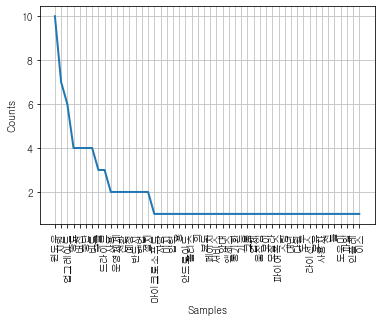

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [30]:
# 한글폰트 지정
from matplotlib import font_manager, rc
font_fname = 'c:/windows/fonts/gulim.ttc'     # A font of your choice
font_name = font_manager.FontProperties(fname=font_fname).get_name()
rc('font', family='gulim')

ko.plot(50)   # 상위 50개 정렬 빈도분포

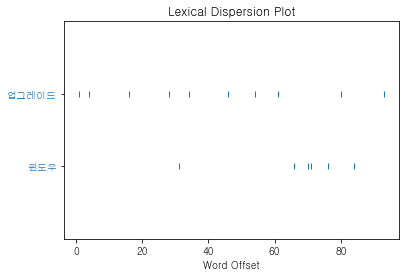

In [36]:
ko.dispersion_plot(['윈도우', '업그레이드'])